# Иллюстрация релевантности выбранных инструментов

In [53]:
library(tidyverse)
library(fixest)
library(arrow)

In [54]:
df = read_parquet('../data/preprocessed_data/regressors.parquet.gzip')
df %>% head()

country,t,cases,deaths,tests,C1M_School_closing,C2M_Workplace_closing,C3M_Cancel_public_events,C4M_Restrictions_on_gatherings,C5M_Close_public_transport,⋯,female_mortality,male_mortality,infant_mortality,largest_city_share,urbanization,country:household_size,avg_hh_size,share_1_members,share_2_3_members,share_4_5_members
<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SLV,2020,19.6259116,0.57060773,NA,2.426229,1.4344262,1.306011,2.297814,0.8333333,⋯,124.344,293.265,11.0,24.14867,17.73575,SLV,3.92,8.46,36.01,37.84
ASM,2022,467.6200274,1.92600000,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
BOL,2020,35.1308840,2.07754144,NA,2.418033,1.8306011,1.527322,2.844262,1.4207650,⋯,190.705,316.665,21.0,22.42107,41.25143,BOL,3.53,20.34,34.82,27.64
SLE,2020,0.8507182,0.02530387,NA,1.606557,0.2349727,1.087432,1.822404,0.3360656,⋯,228.946,270.279,80.3,35.38844,15.18978,SLE,5.29,6.42,20.52,33.28
LKA,2020,4.9664917,0.02309392,NA,1.931694,0.5546448,1.027322,2.180328,0.4508197,⋯,65.980,152.109,6.0,14.93368,NA,NA,NA,NA,NA,NA
ATG,2022,143.9042740,0.82619178,NA,NA,NA,NA,NA,NA,⋯,60.727,104.913,8.1,NA,NA,NA,NA,NA,NA,NA


In [55]:
df %>% names()

[1] "country"                              
 [2] "t"                                    
 [3] "cases"                                
 [4] "deaths"                               
 [5] "tests"                                
 [6] "C1M_School_closing"                   
 [7] "C2M_Workplace_closing"                
 [8] "C3M_Cancel_public_events"             
 [9] "C4M_Restrictions_on_gatherings"       
[10] "C5M_Close_public_transport"           
[11] "C6M_Stay_at_home_requirements"        
[12] "C7M_Restrictions_on_internal_movement"
[13] "C8EV_International_travel_controls"   
[14] "E1_Income_support"                    
[15] "E2_Debt_contract_relief"              
[16] "E3_Fiscal_measures"                   
[17] "E4_International_support"             
[18] "H1_Public_information_campaigns"      
[19] "H2_Testing_policy"                    
[20] "H3_Contact_tracing"                   
[21] "H4_Emergency_investment_in_healthcare"
[22] "H5_Investment_in_vaccines"            
[23] "H6M_Facial_Coverings"                 
[24] "H7_Vaccination_policy"                
[25] "H8M_Protection_of_elderly_people"     
[26] "StringencyIndex_Average"              
[27] "GovernmentResponseIndex_Average"      
[28] "ContainmentHealthIndex_Average"       
[29] "EconomicSupportIndex"                 
[30] "MajorityVaccinated"                   
[31] "PopulationVaccinated"                 
[32] "country:temp"                         
[33] "t:temp"                               
[34] "average_surface_temperature"          
[35] "country:median_age_table"             
[36] "t:median_age_table"                   
[37] "median_age"                           
[38] "country:SARS_table"                   
[39] "SARS_total_cases"                     
[40] "country:density_and_mortality"        
[41] "t:density_and_mortality"              
[42] "population_density"                   
[43] "female_ratio"                         
[44] "maternal_mortality"                   
[45] "cvd_mortality"                        
[46] "pollution_mortality"                  
[47] "poisoning_mortality"                  
[48] "hygiene_mortality"                    
[49] "female_mortality"                     
[50] "male_mortality"                       
[51] "infant_mortality"                     
[52] "largest_city_share"                   
[53] "urbanization"                         
[54] "country:household_size"               
[55] "avg_hh_size"                          
[56] "share_1_members"                      
[57] "share_2_3_members"                    
[58] "share_4_5_members"

In [56]:
demeaned_df = fixest::demean(df[, c('deaths', 'cases', 'C1M_School_closing', 'median_age',
 'average_surface_temperature', 'population_density', 'H6M_Facial_Coverings', 'share_1_members',
 'C3M_Cancel_public_events', 'C4M_Restrictions_on_gatherings', 'H1_Public_information_campaigns',
 'H2_Testing_policy', 'H3_Contact_tracing', 'H4_Emergency_investment_in_healthcare', 'H5_Investment_in_vaccines',
 'H7_Vaccination_policy', 'H8M_Protection_of_elderly_people', 'MajorityVaccinated', 
 'PopulationVaccinated', 'female_ratio', 'female_mortality', 'male_mortality', 'infant_mortality',
 'largest_city_share', 'urbanization')]
 , df[, c('country', 't')]) 
demeaned_df %>% head()

NOTE: 575 observations removed because of NA values (Breakup: X: 575, f: 0).



deaths,cases,C1M_School_closing,median_age,average_surface_temperature,population_density,H6M_Facial_Coverings,share_1_members,C3M_Cancel_public_events,C4M_Restrictions_on_gatherings,⋯,H7_Vaccination_policy,H8M_Protection_of_elderly_people,MajorityVaccinated,PopulationVaccinated,female_ratio,female_mortality,male_mortality,infant_mortality,largest_city_share,urbanization
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1665065,26.011067,0.34304928,-0.07764492,-0.13332040,0.16388730,-0.28135801,0,-0.001599684,1.08859470,⋯,-0.21137585,0.6604228,-0.09153042,-6.1251865,0.0005079777,2.645453,2.451133,-0.11827980,0.12981199,0.10993399
0.2849185,2.758553,-0.05556959,0.03835525,0.27043885,0.61739834,-0.44123156,0,0.559740976,1.35496950,⋯,-0.05247178,0.8263559,0.05504493,0.2218818,-0.0392773663,-6.088049,-3.401864,0.03172077,0.02271627,-0.08677755
0.4359641,32.765128,-0.07363606,0.01485481,-0.02118511,-0.58776747,0.05441558,0,-0.241026296,0.16732818,⋯,-0.13329365,0.5049808,0.05504493,6.4226624,0.0112187033,3.757952,7.496619,0.78172268,0.08153127,0.04985728
0.4348155,33.080084,-0.46085436,-0.13564549,-0.14275014,0.60616893,0.63056647,0,0.035962985,0.07711184,⋯,-0.36760387,-0.1352018,-0.13947562,-7.2976118,-0.0082739622,4.713451,6.953128,-0.11827956,-0.01708199,-0.27518259
0.3291761,31.204575,0.10699123,0.03885402,-0.84633574,-0.04076286,0.17679756,0,-0.184622361,0.72670764,⋯,-0.24699237,0.7406347,0.05504493,6.1200870,-0.0048724575,2.004450,-6.104363,0.33172192,0.15886091,0.07531895
0.0000000,0.000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0.000000000,0.00000000,⋯,0.00000000,0.0000000,0.00000000,0.0000000,0.0000000000,0.000000,0.000000,0.00000000,0.00000000,0.00000000


### Смертность

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


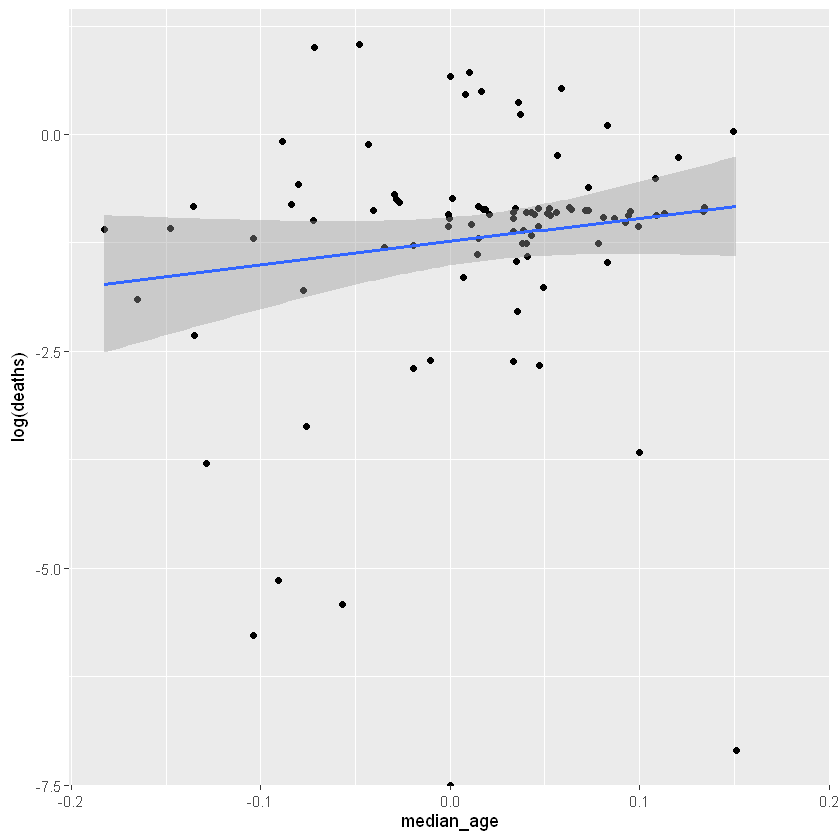

In [57]:
ggplot(data = demeaned_df, aes(x=median_age, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


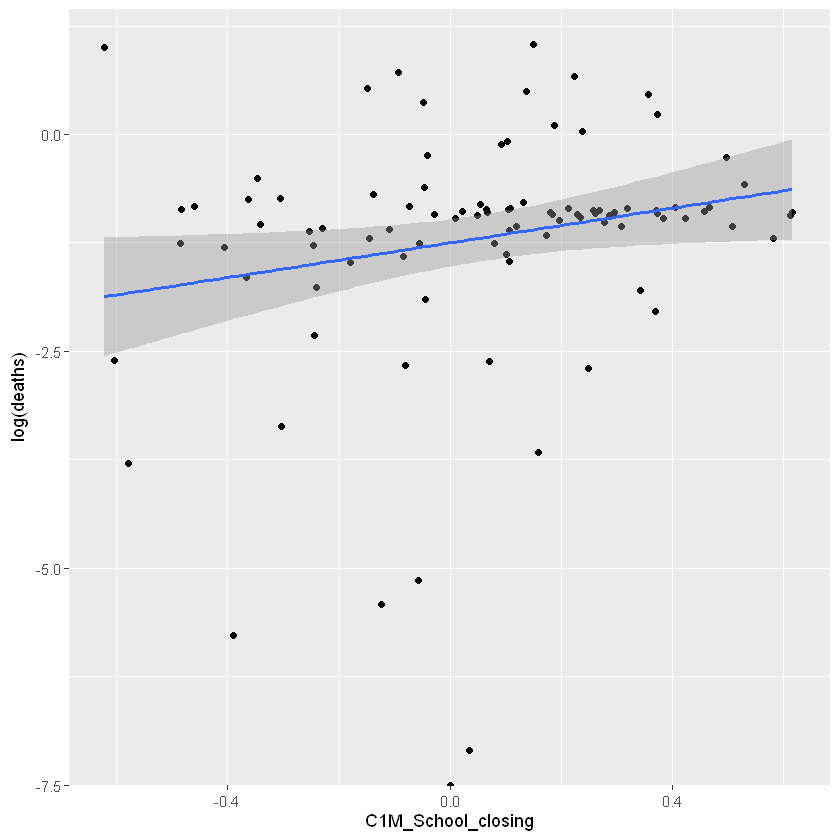

In [58]:
ggplot(data = demeaned_df, aes(x=C1M_School_closing, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


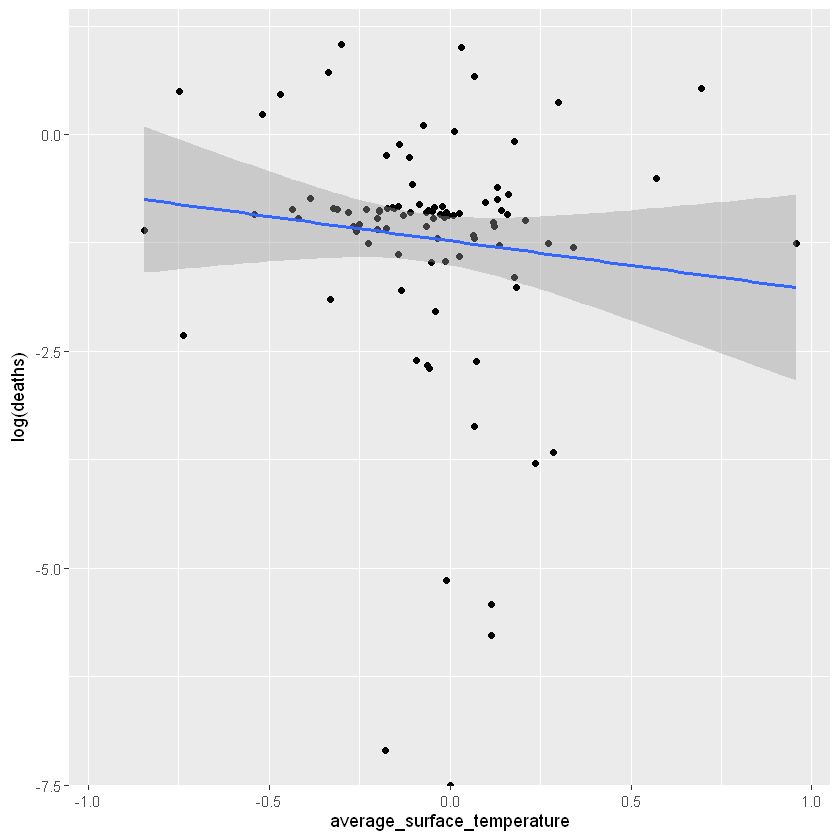

In [59]:
ggplot(data = demeaned_df, aes(x=average_surface_temperature, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


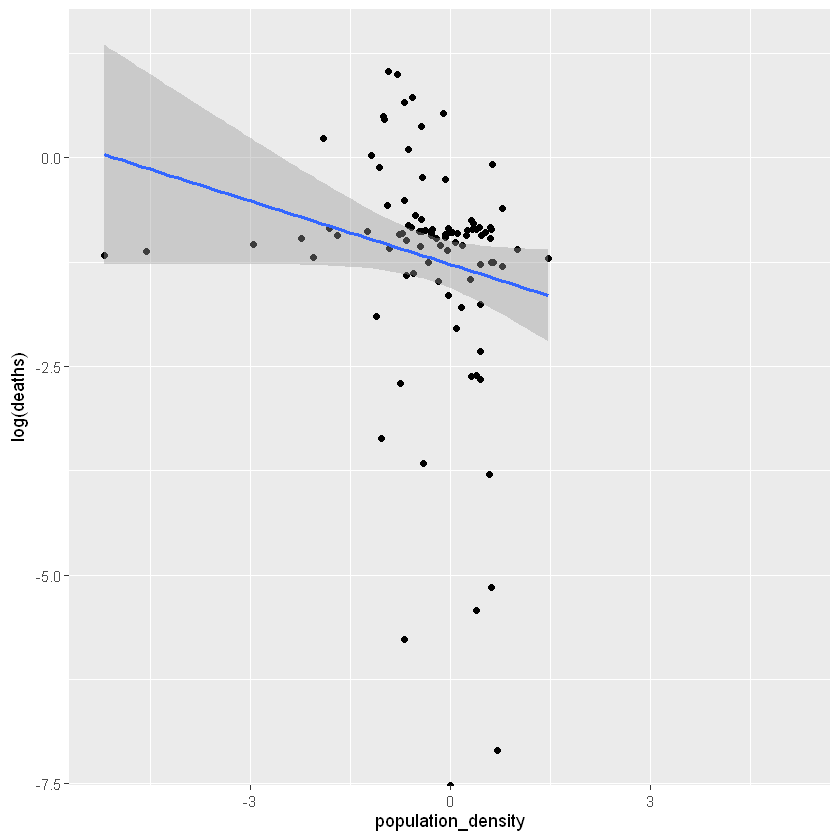

In [60]:
ggplot(data = demeaned_df, aes(x=population_density, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


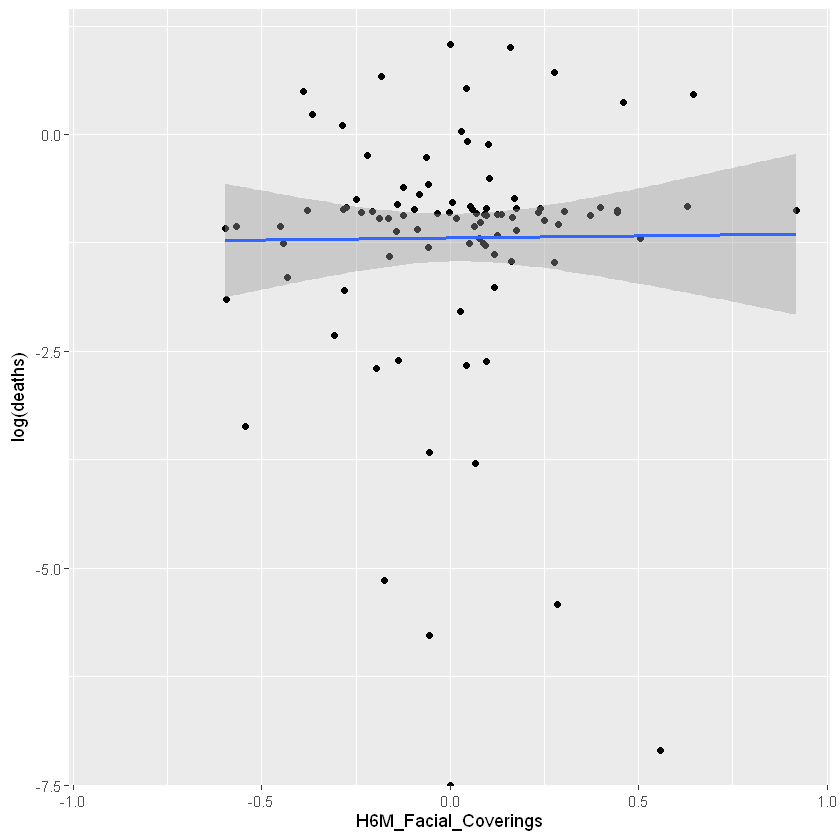

In [61]:
ggplot(data = demeaned_df, aes(x=H6M_Facial_Coverings, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


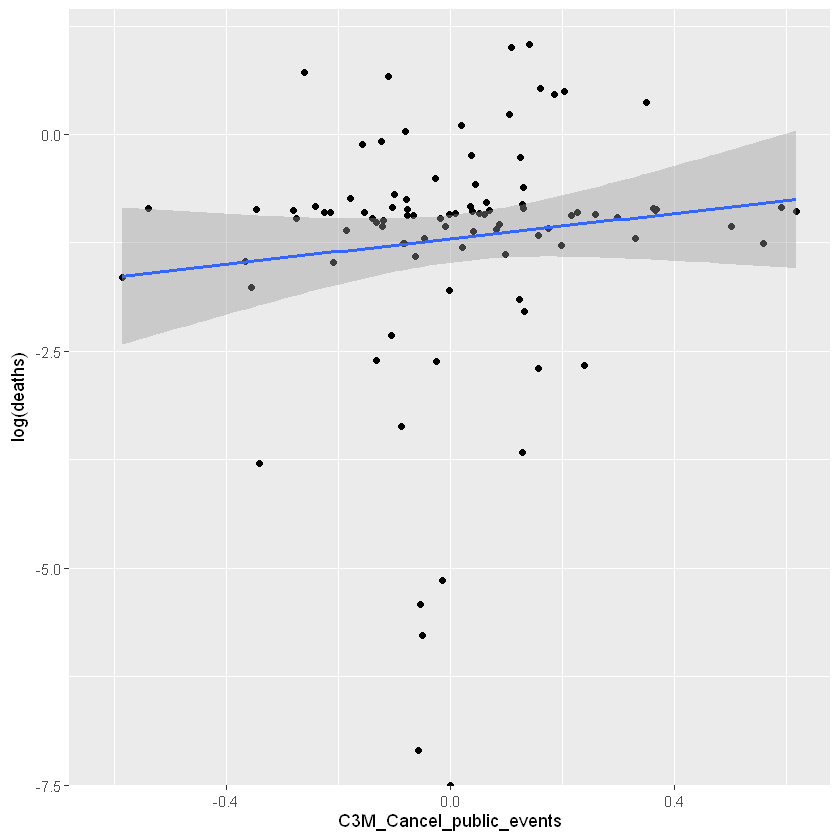

In [62]:
ggplot(data = demeaned_df, aes(x=C3M_Cancel_public_events, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


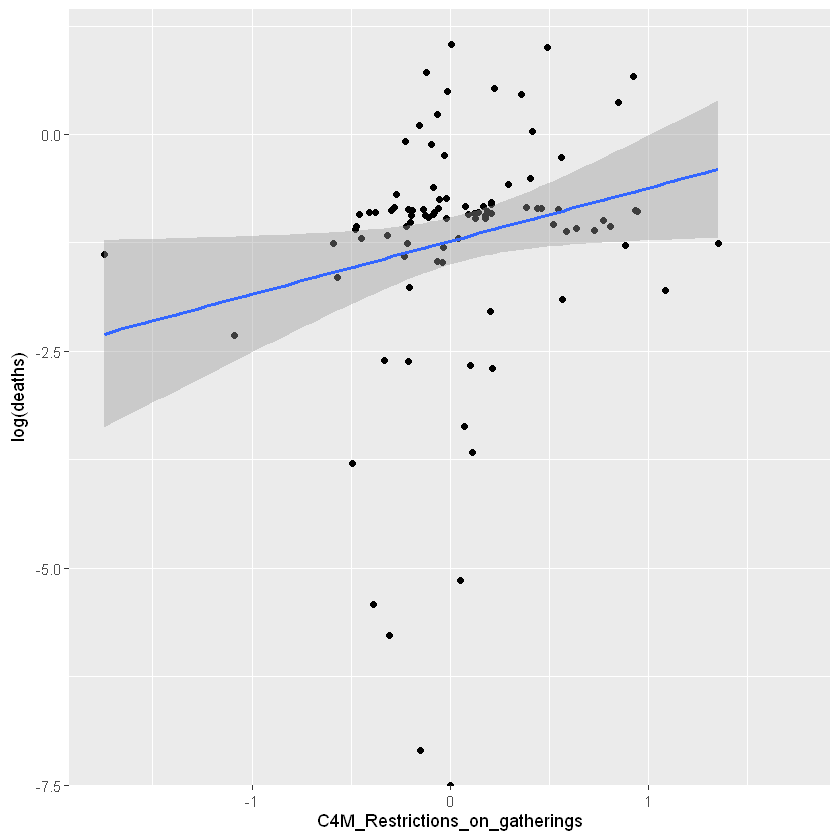

In [63]:
ggplot(data = demeaned_df, aes(x=C4M_Restrictions_on_gatherings, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


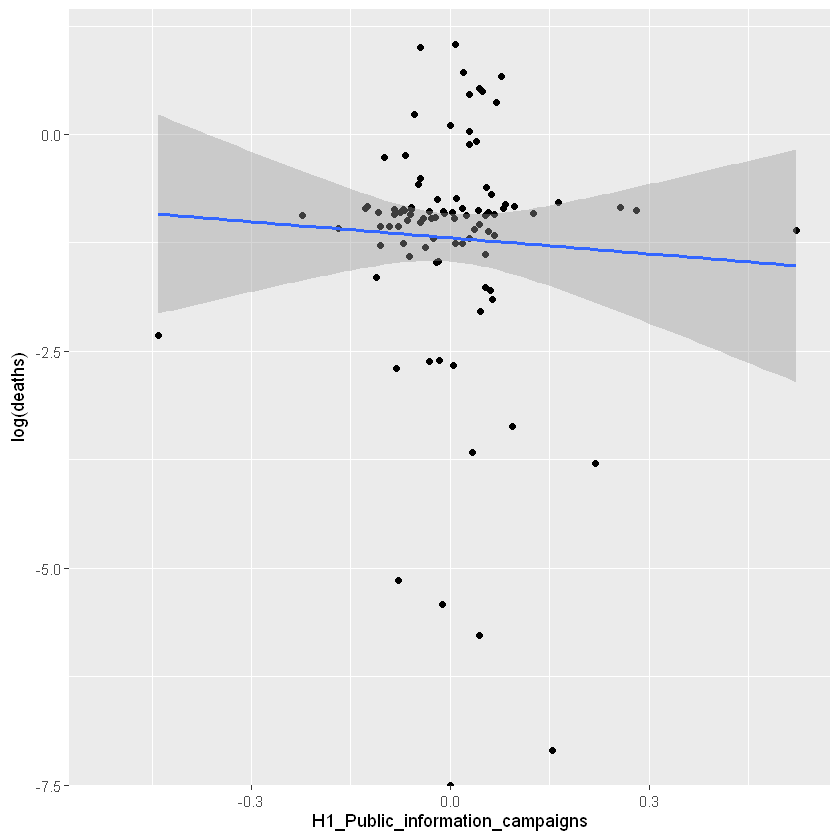

In [64]:
ggplot(data = demeaned_df, aes(x=H1_Public_information_campaigns, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


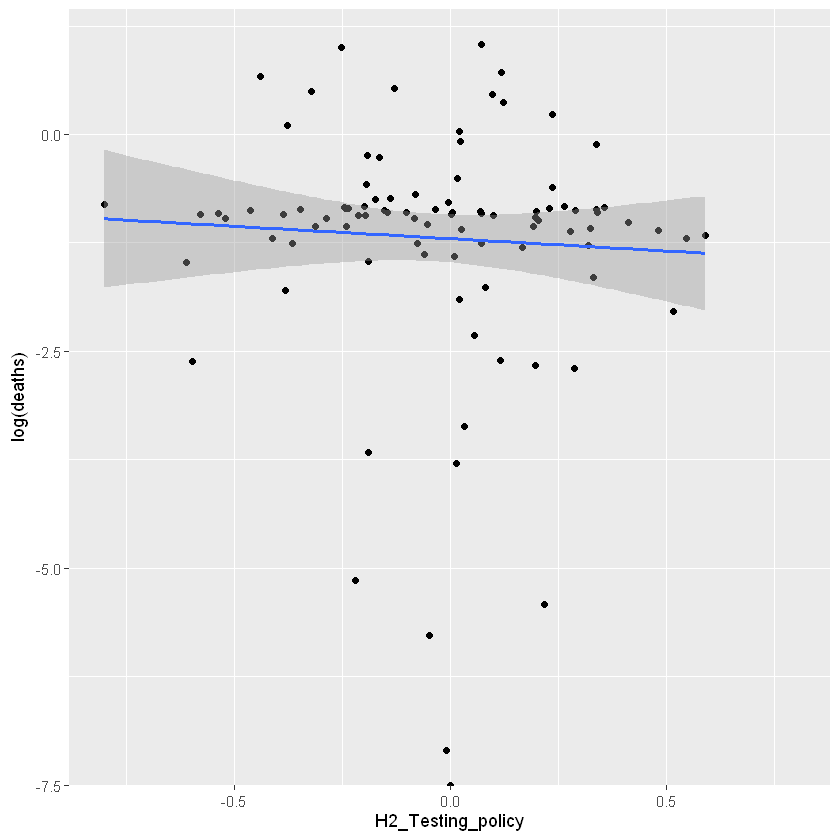

In [65]:
ggplot(data = demeaned_df, aes(x=H2_Testing_policy, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


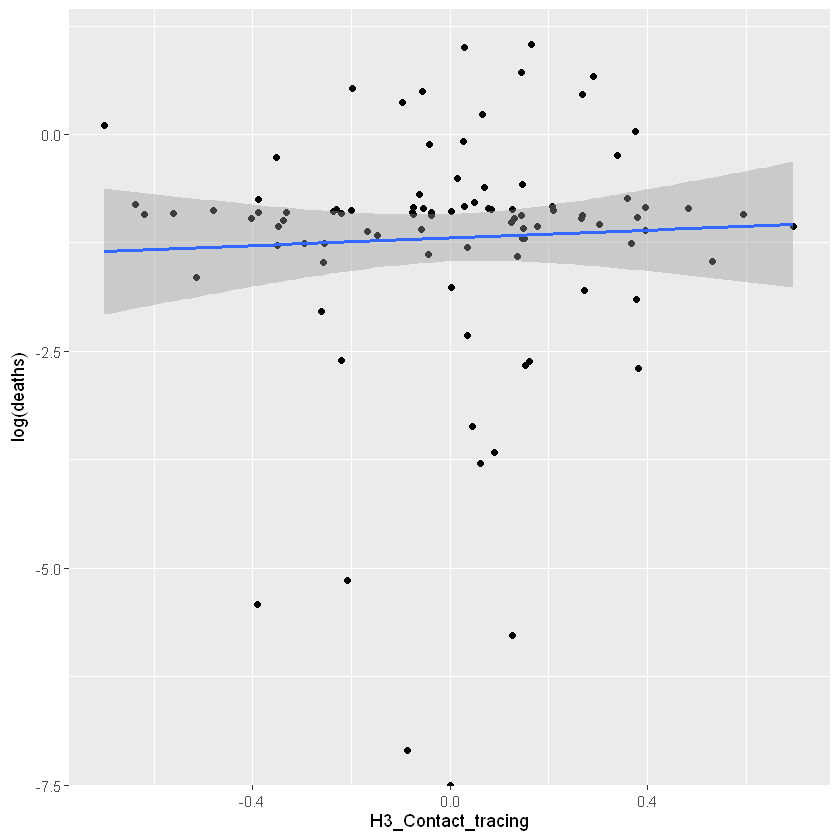

In [66]:
ggplot(data = demeaned_df, aes(x=H3_Contact_tracing, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(H4_Emergency_investment_in_healthcare):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
Warning message in log(H4_Emergency_investment_in_healthcare):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 124 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 120 rows containing missing values or values outside the scale range
(`geom_point()`)."


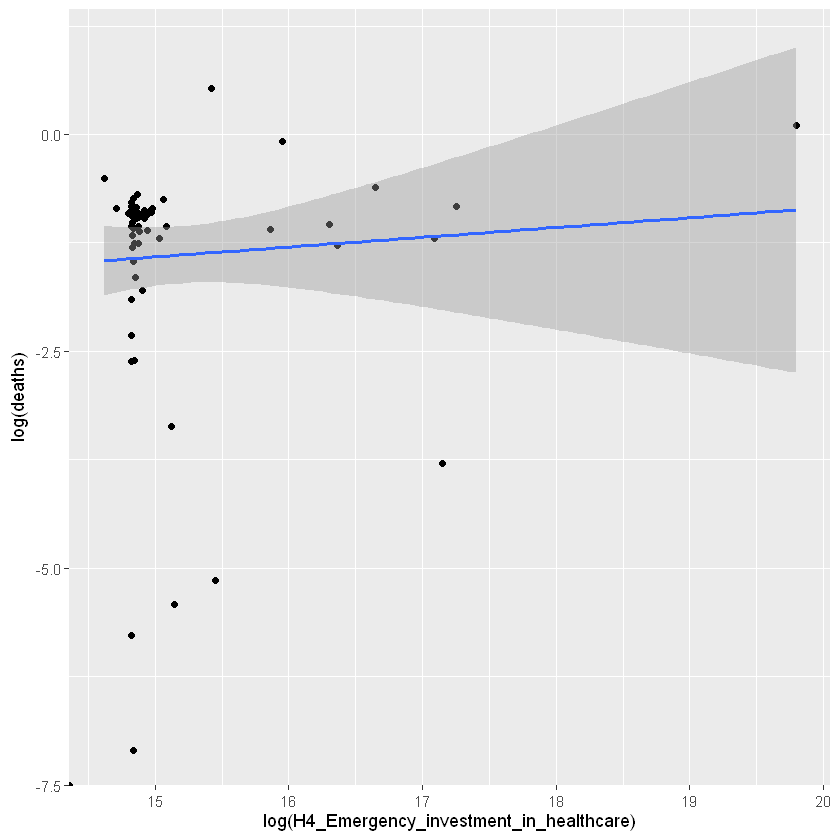

In [67]:
ggplot(data = demeaned_df, aes(x=log(H4_Emergency_investment_in_healthcare), y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


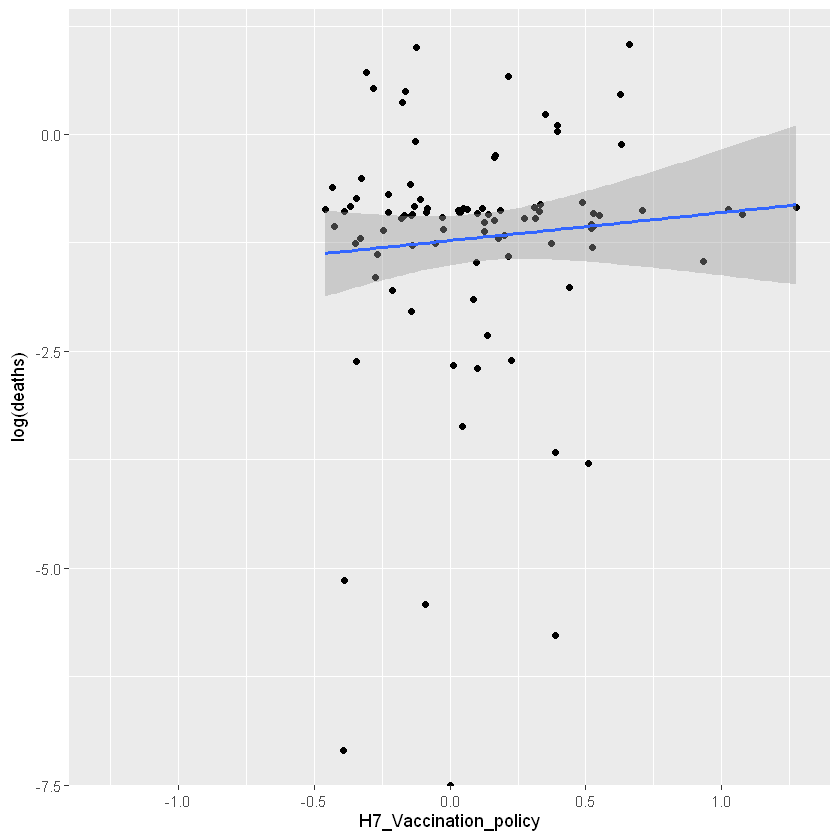

In [68]:
ggplot(data = demeaned_df, aes(x=H7_Vaccination_policy, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


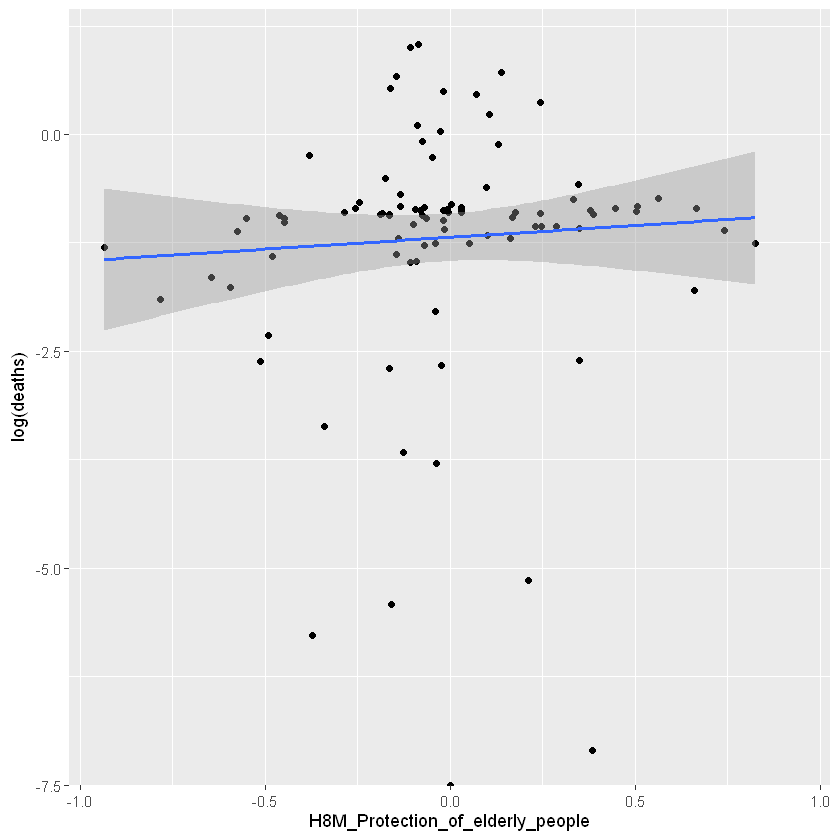

In [69]:
ggplot(data = demeaned_df, aes(x=H8M_Protection_of_elderly_people, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


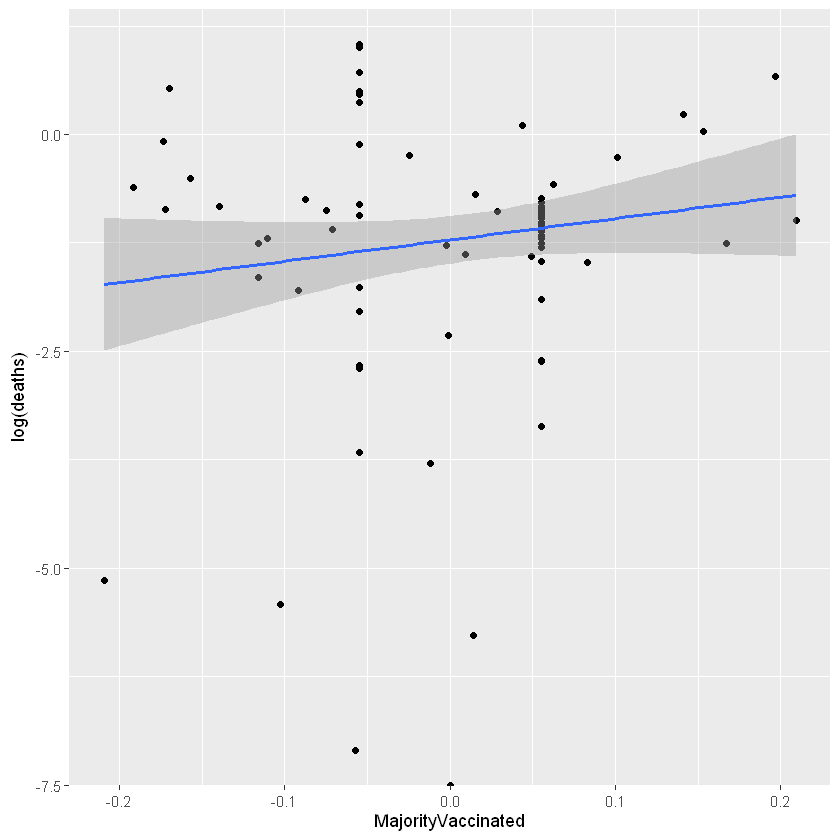

In [70]:
ggplot(data = demeaned_df, aes(x=MajorityVaccinated, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


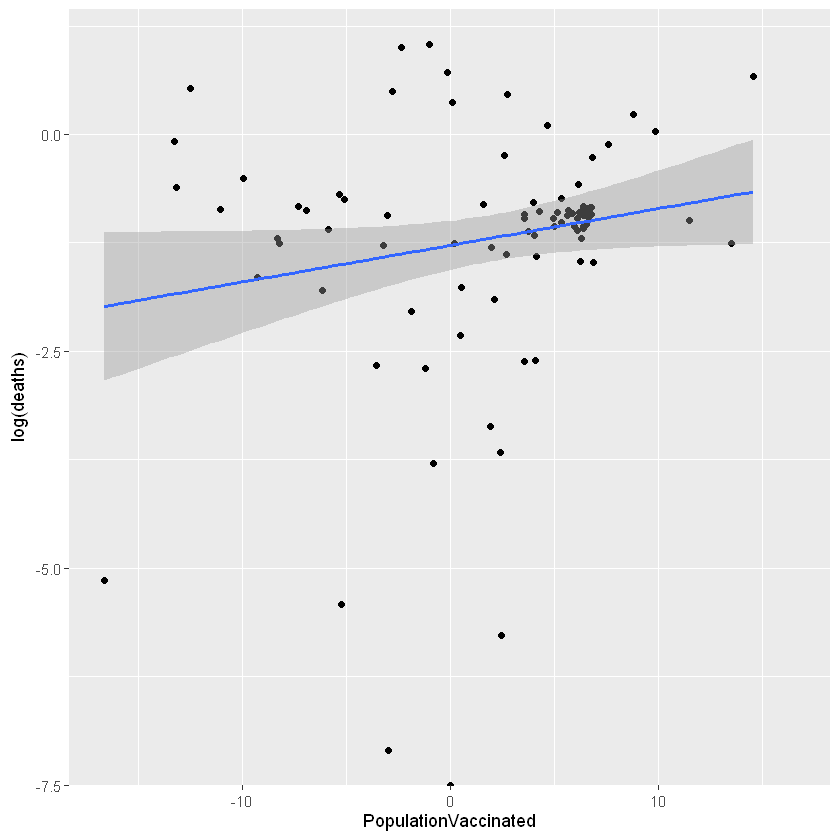

In [71]:
ggplot(data = demeaned_df, aes(x=PopulationVaccinated, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


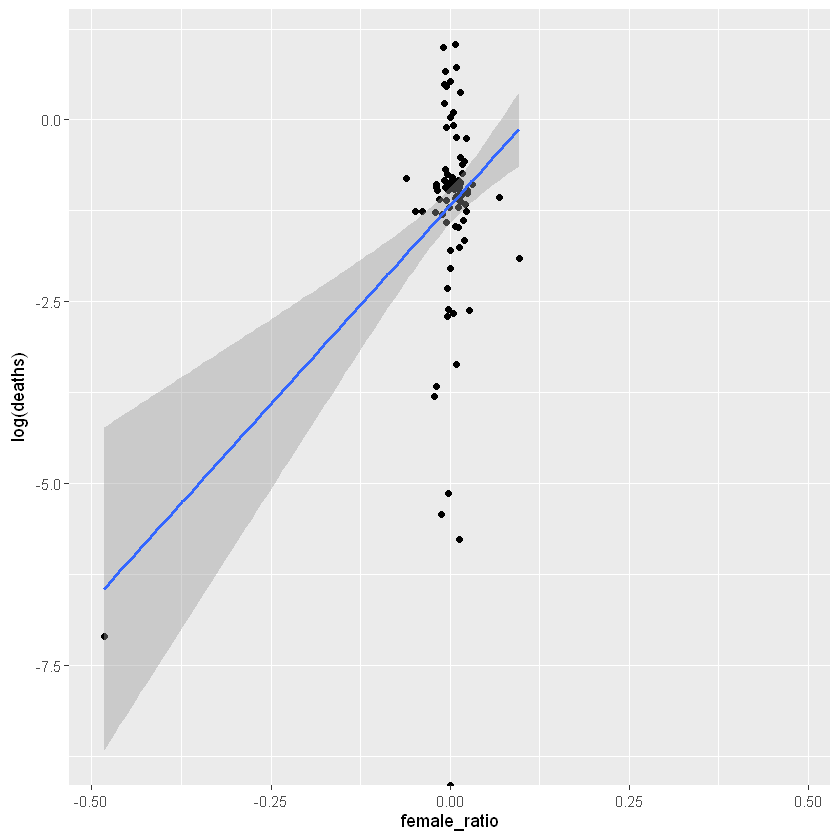

In [72]:
ggplot(data = demeaned_df, aes(x=female_ratio, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


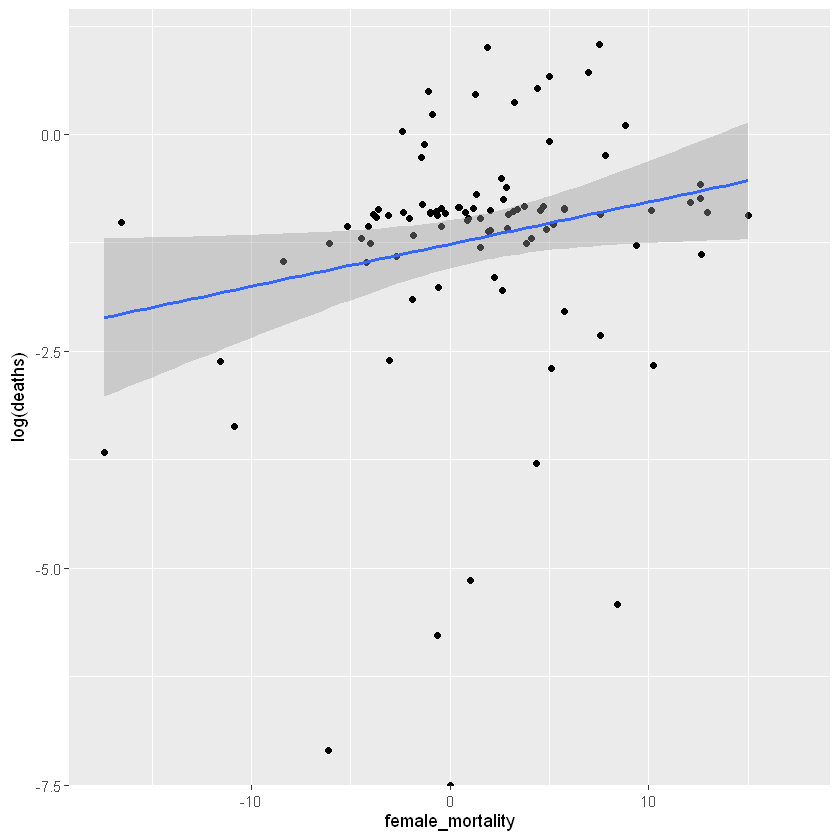

In [73]:
ggplot(data = demeaned_df, aes(x=female_mortality, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


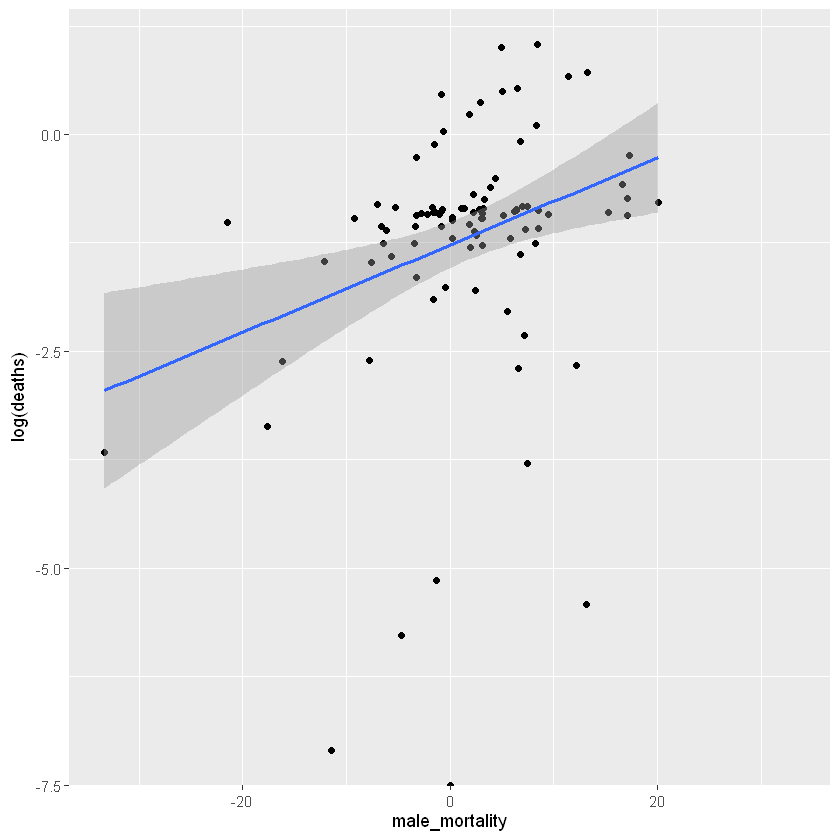

In [74]:
ggplot(data = demeaned_df, aes(x=male_mortality, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


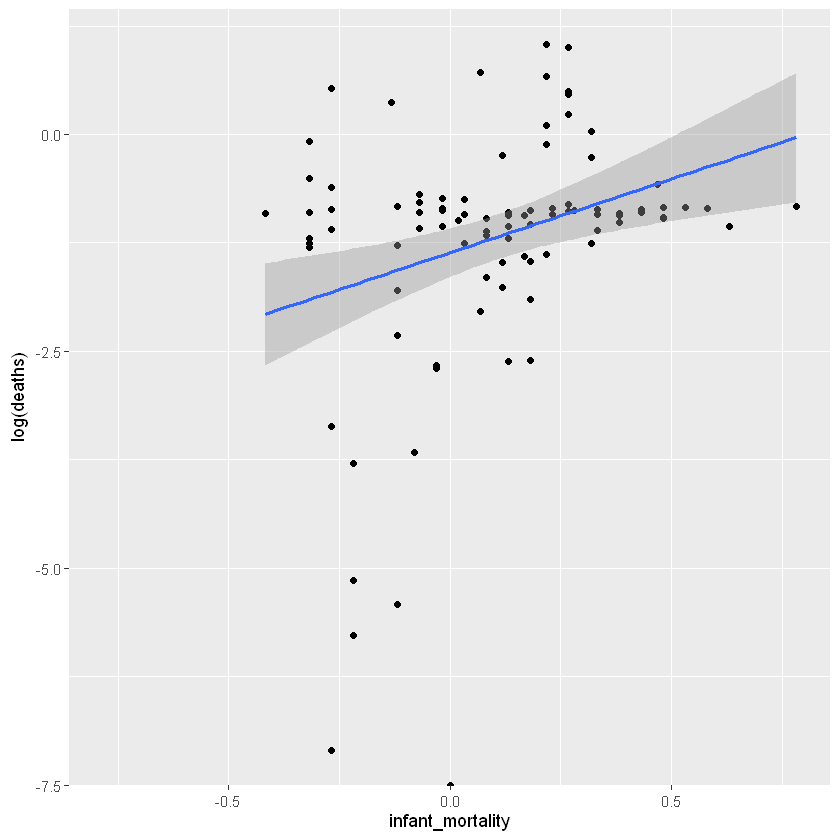

In [75]:
ggplot(data = demeaned_df, aes(x=infant_mortality, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


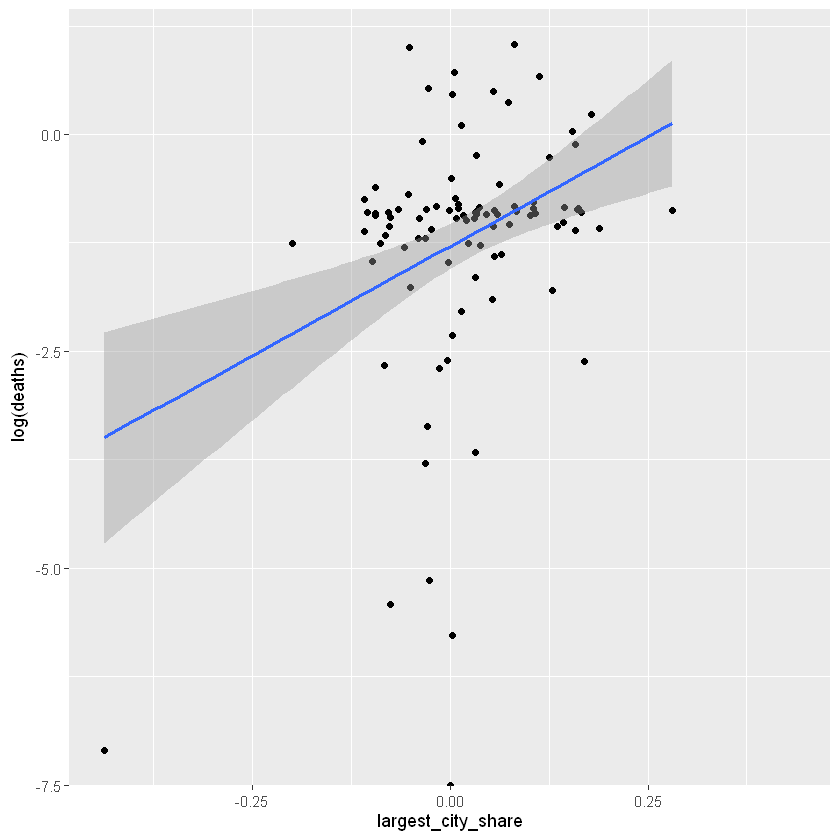

In [76]:
ggplot(data = demeaned_df, aes(x=largest_city_share, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(deaths):
"созданы NaN"
Warning message in log(deaths):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


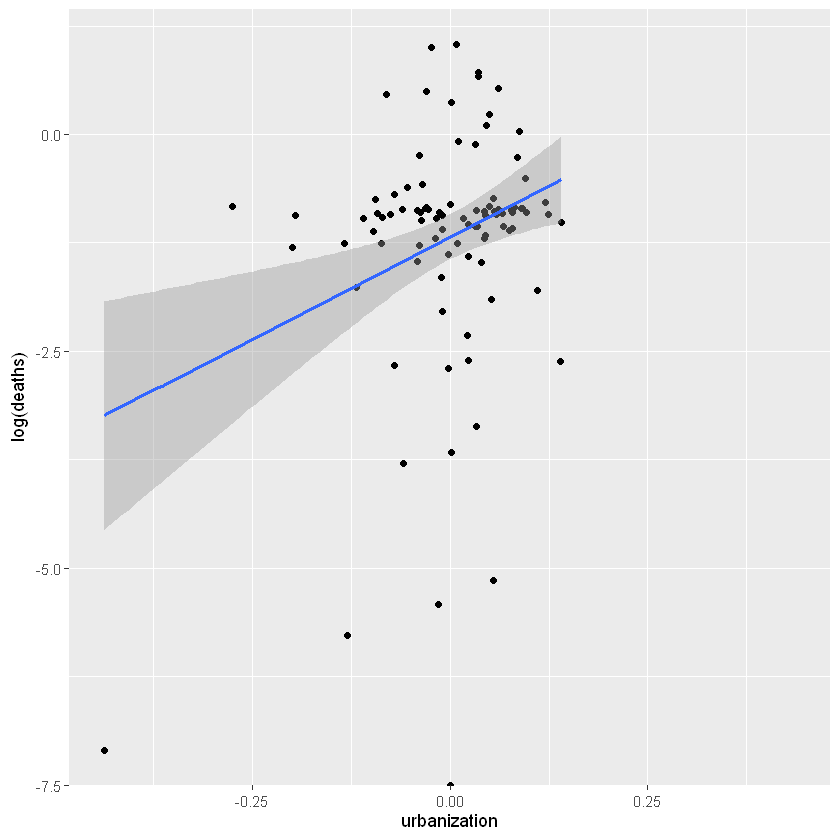

In [77]:
ggplot(data = demeaned_df, aes(x=urbanization, y=log(deaths))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

### Заболеваемость

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


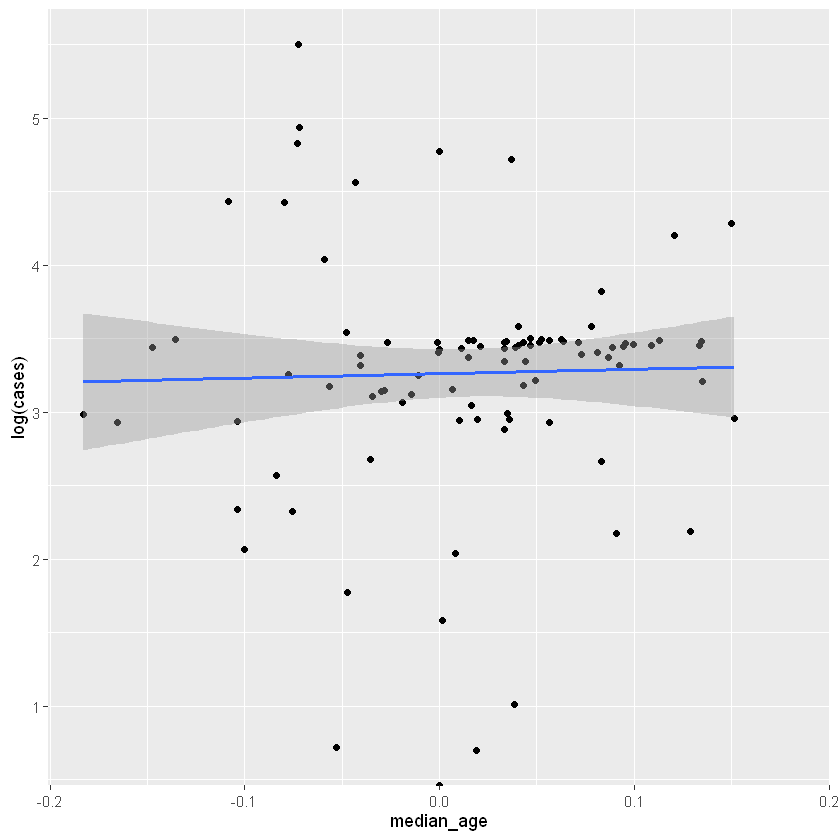

In [78]:
ggplot(data = demeaned_df, aes(x=median_age, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


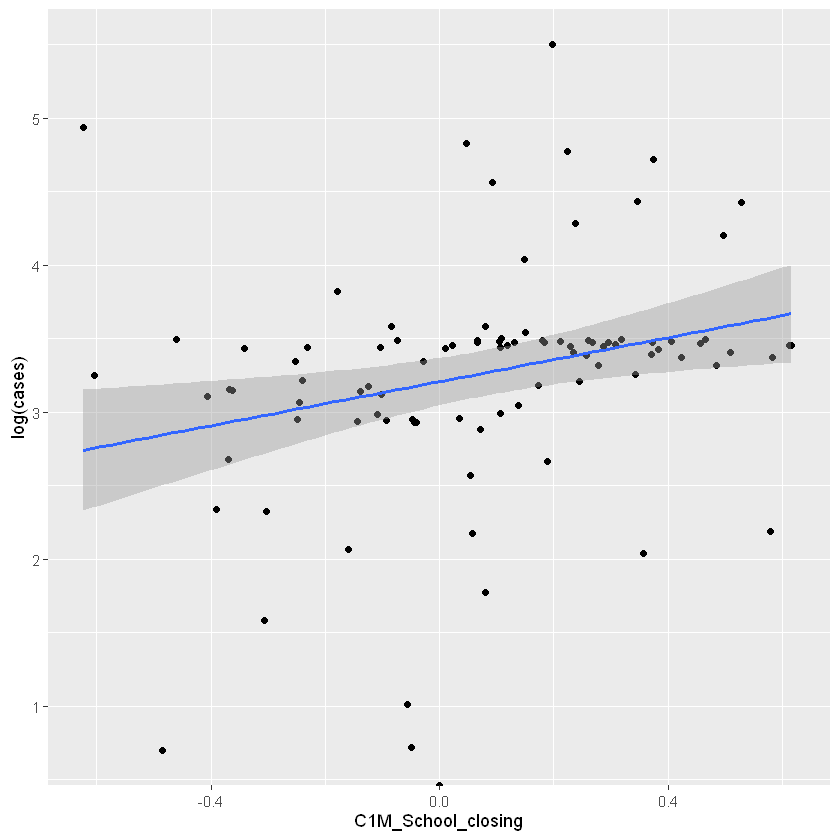

In [79]:
ggplot(data = demeaned_df, aes(x=C1M_School_closing, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


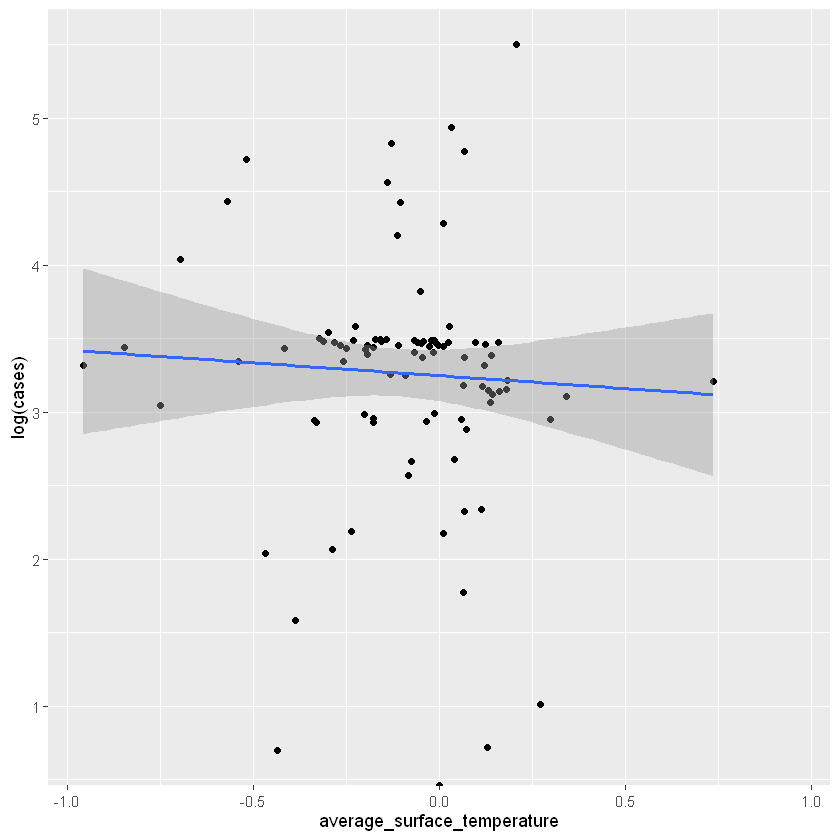

In [80]:
ggplot(data = demeaned_df, aes(x=average_surface_temperature, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


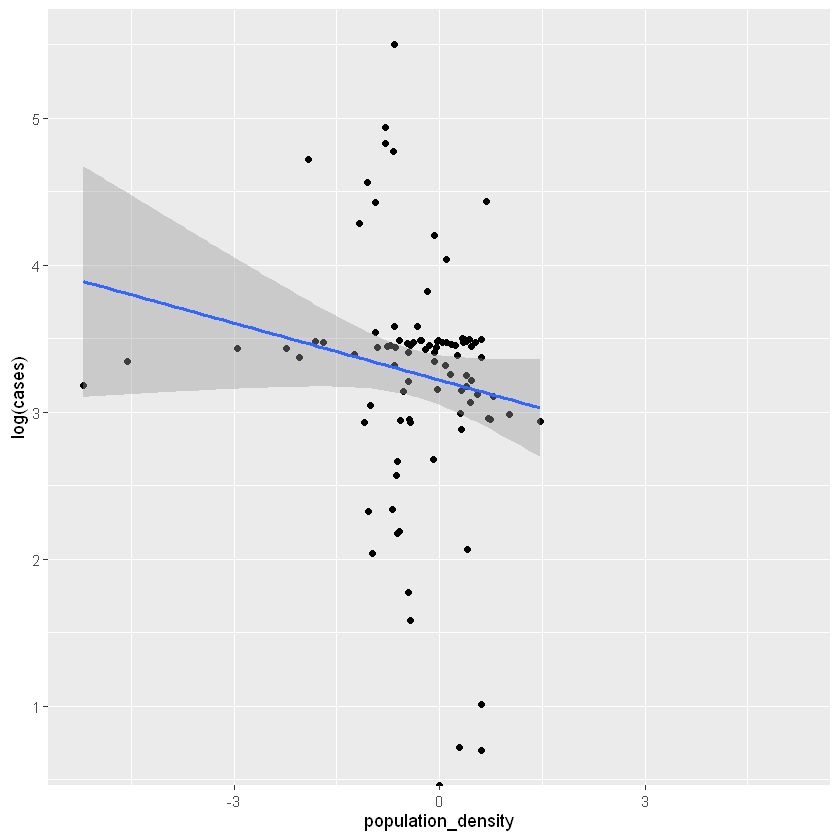

In [81]:
ggplot(data = demeaned_df, aes(x=population_density, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


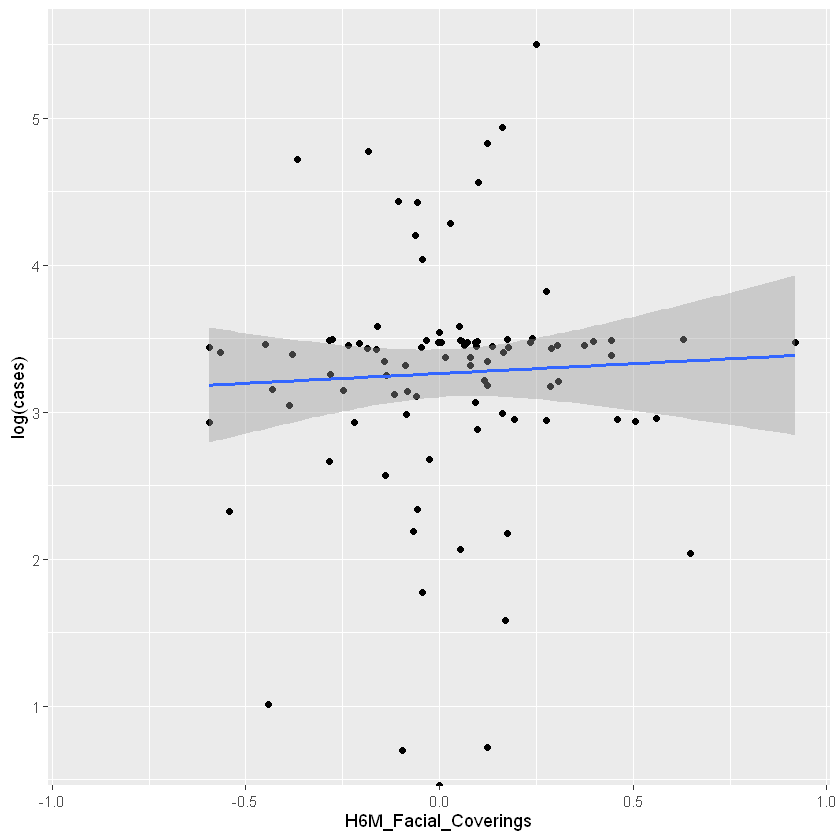

In [82]:
ggplot(data = demeaned_df, aes(x=H6M_Facial_Coverings, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


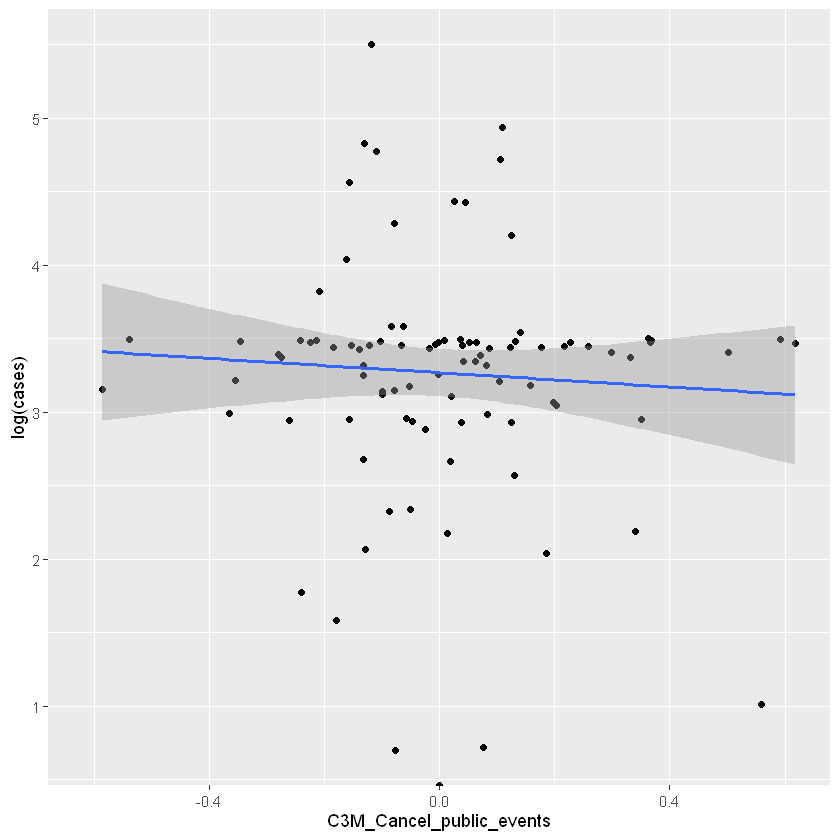

In [83]:
ggplot(data = demeaned_df, aes(x=C3M_Cancel_public_events, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


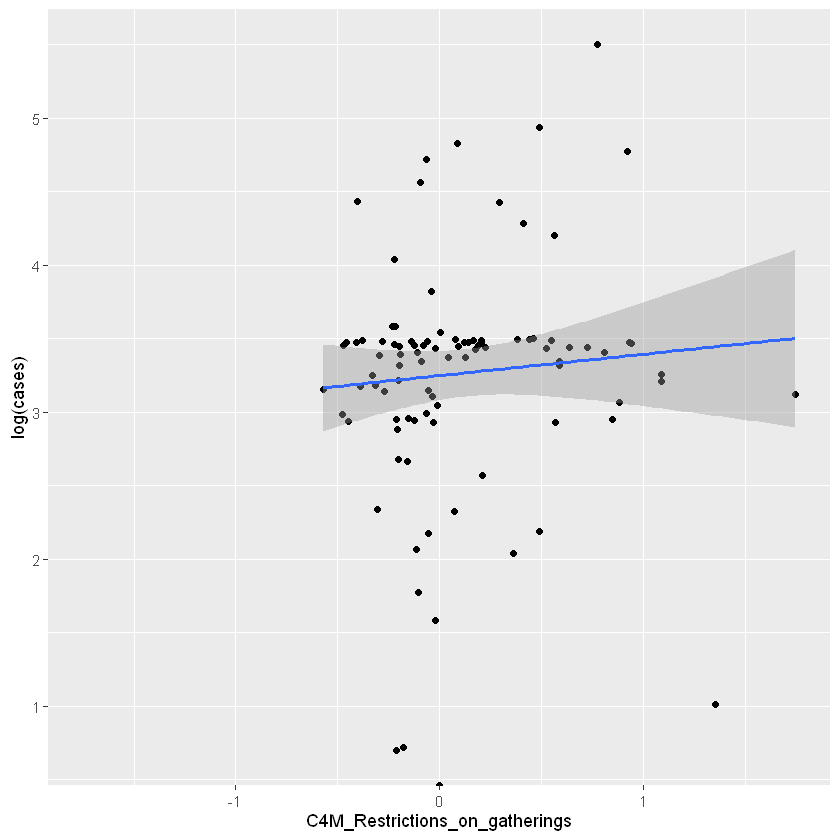

In [84]:
ggplot(data = demeaned_df, aes(x=C4M_Restrictions_on_gatherings, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


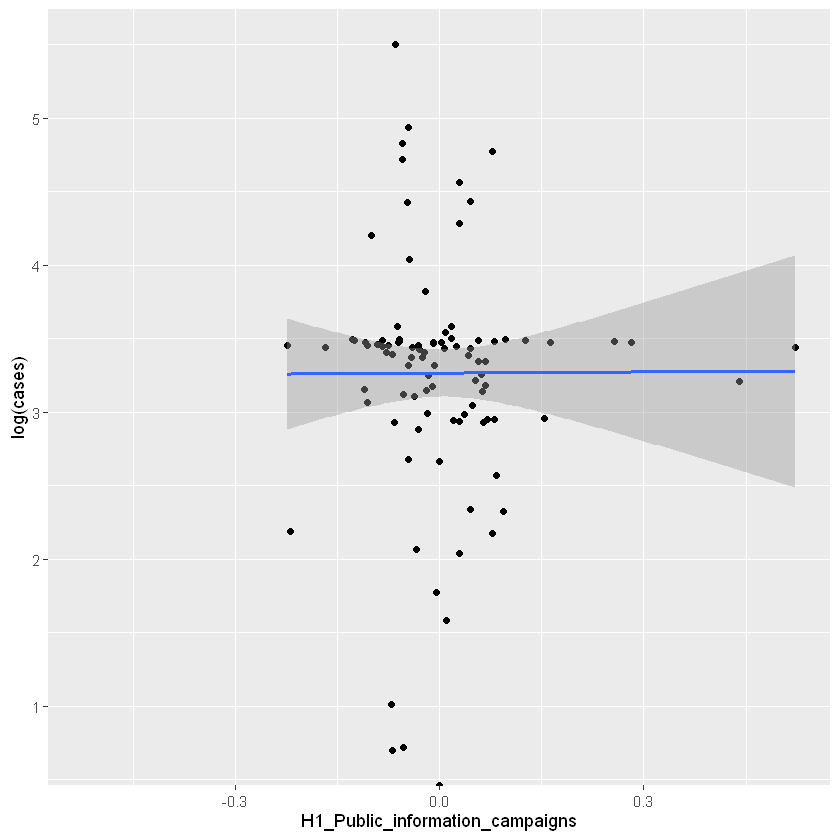

In [85]:
ggplot(data = demeaned_df, aes(x=H1_Public_information_campaigns, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


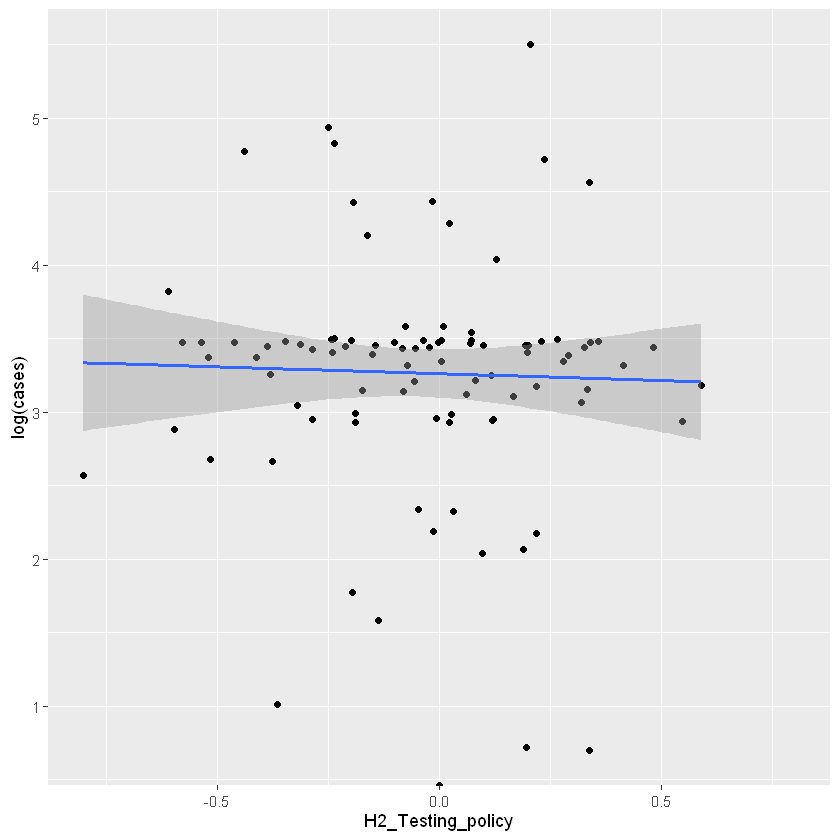

In [86]:
ggplot(data = demeaned_df, aes(x=H2_Testing_policy, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


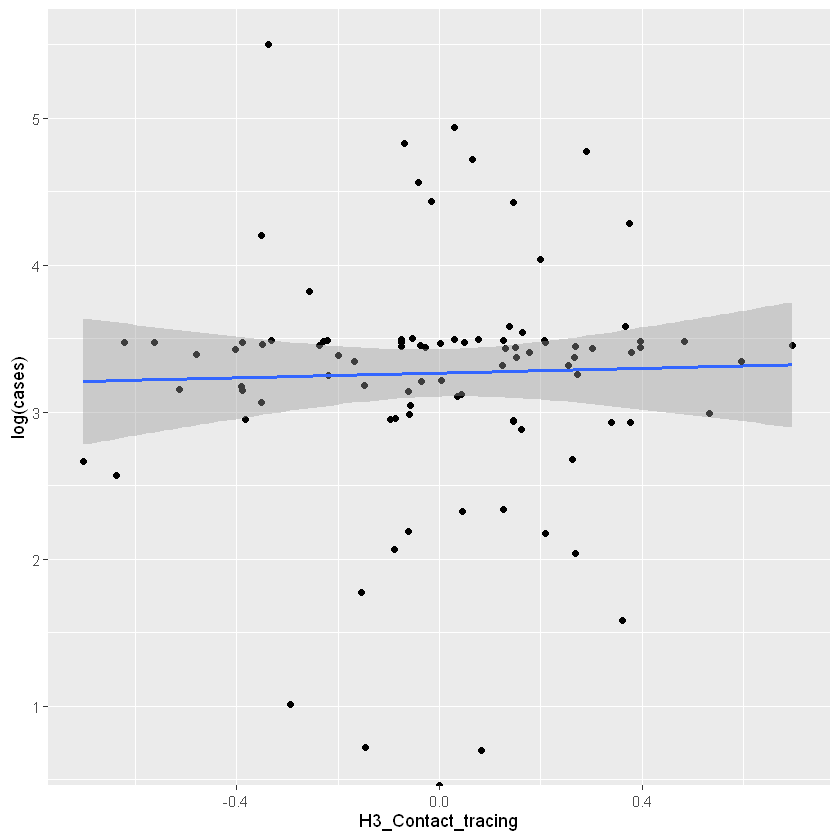

In [87]:
ggplot(data = demeaned_df, aes(x=H3_Contact_tracing, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(H4_Emergency_investment_in_healthcare):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
Warning message in log(H4_Emergency_investment_in_healthcare):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 126 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 122 rows containing missing values or values outside the scale range
(`geom_point()`)."


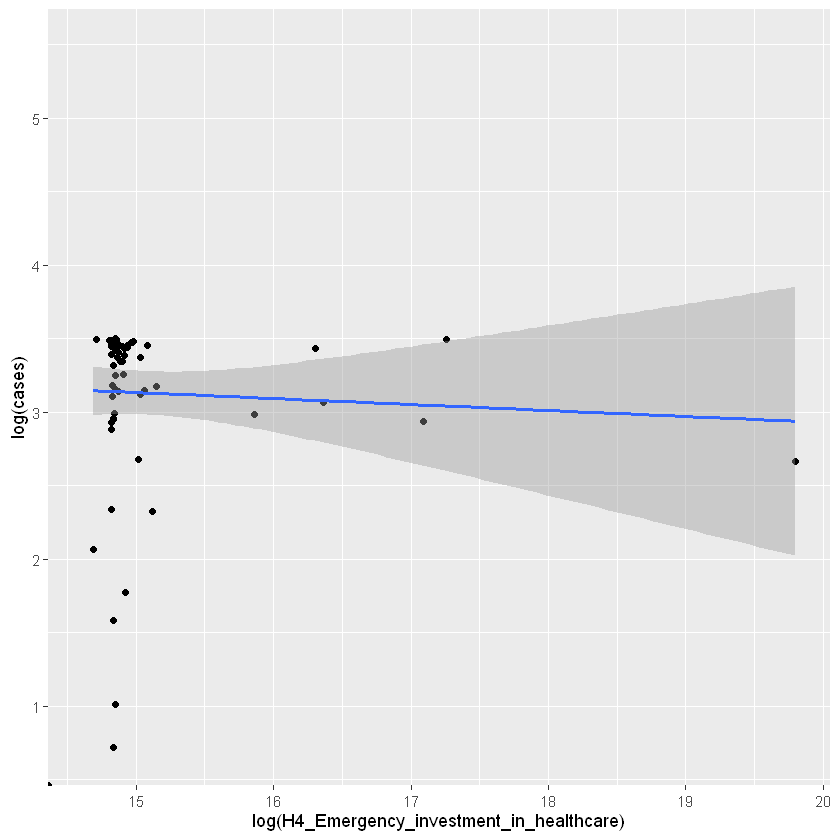

In [88]:
ggplot(data = demeaned_df, aes(x=log(H4_Emergency_investment_in_healthcare), y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


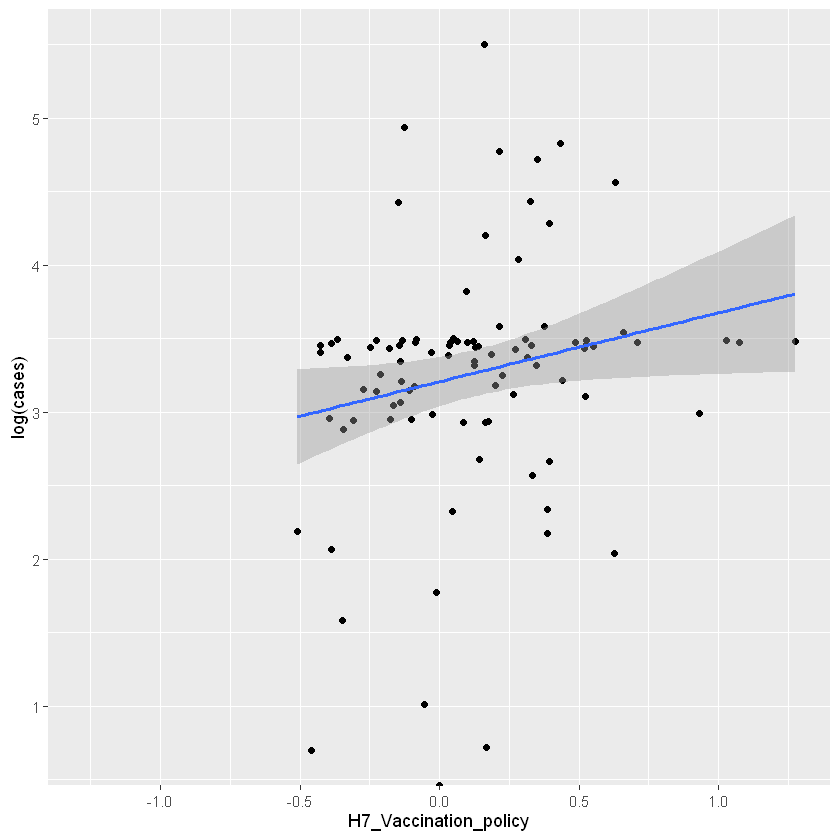

In [89]:
ggplot(data = demeaned_df, aes(x=H7_Vaccination_policy, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


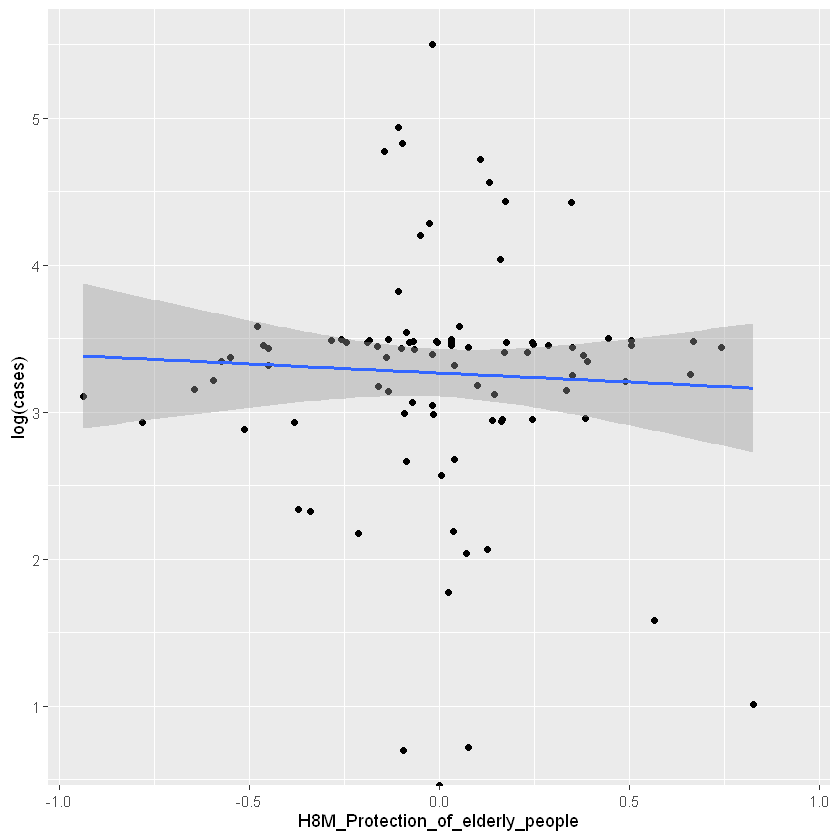

In [90]:
ggplot(data = demeaned_df, aes(x=H8M_Protection_of_elderly_people, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


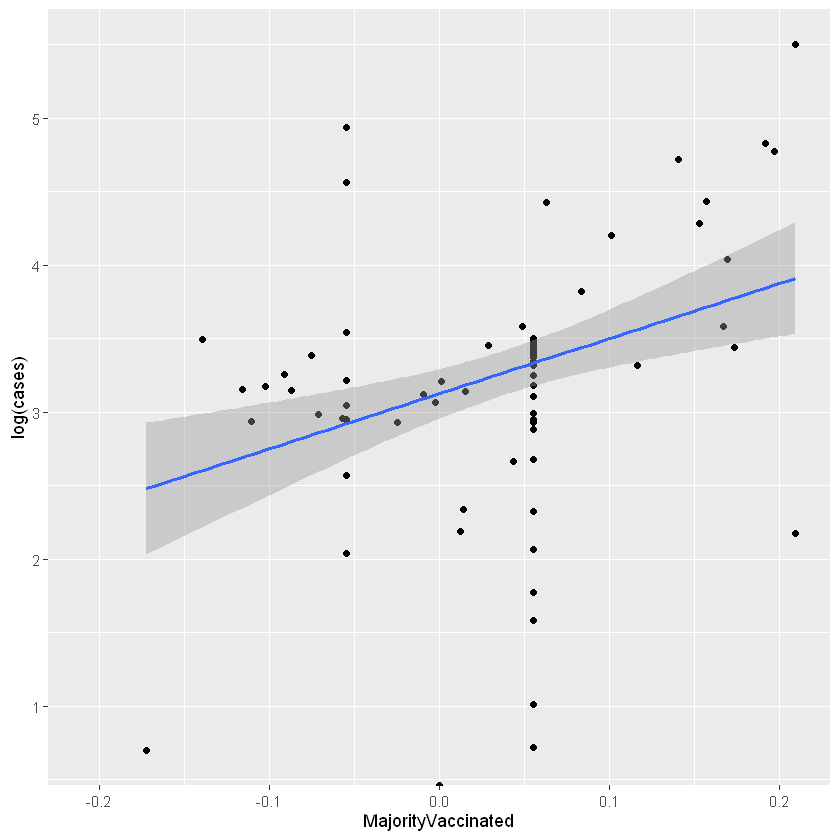

In [91]:
ggplot(data = demeaned_df, aes(x=MajorityVaccinated, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


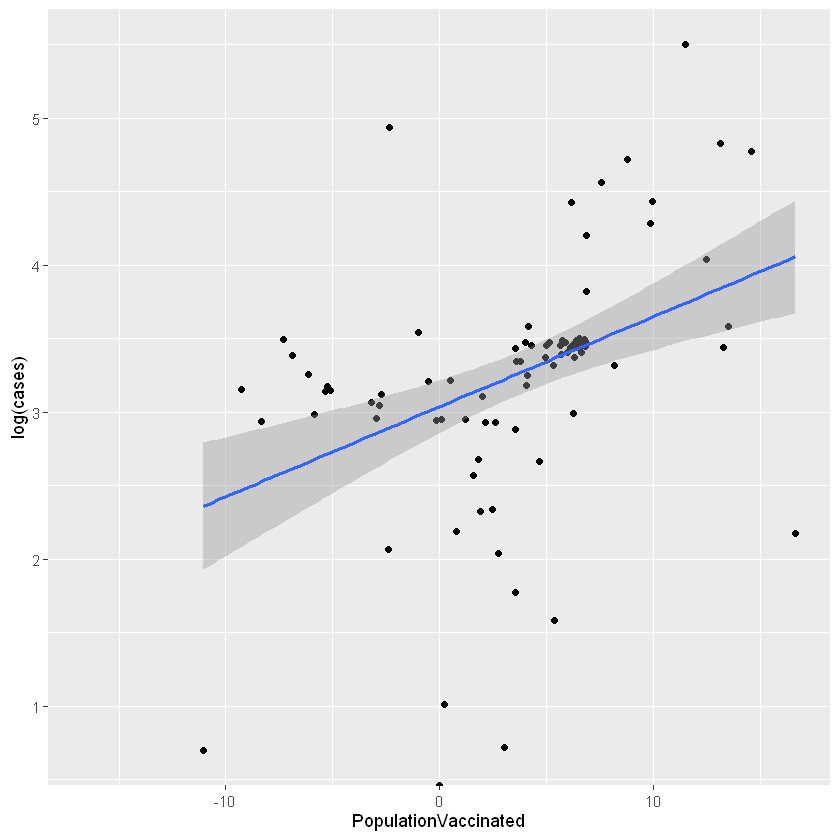

In [92]:
ggplot(data = demeaned_df, aes(x=PopulationVaccinated, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


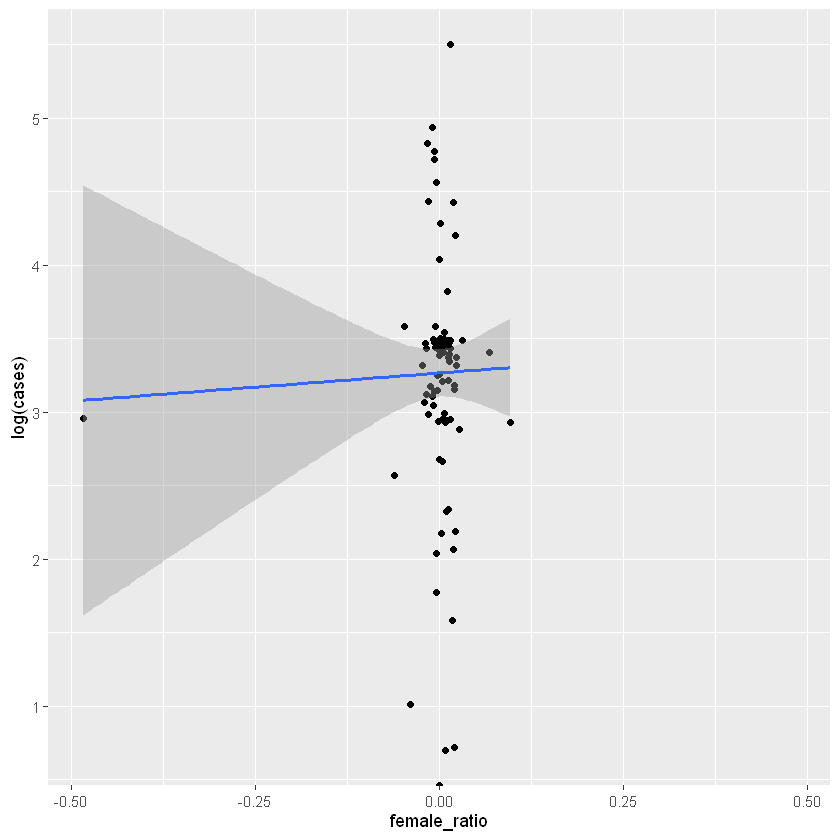

In [93]:
ggplot(data = demeaned_df, aes(x=female_ratio, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


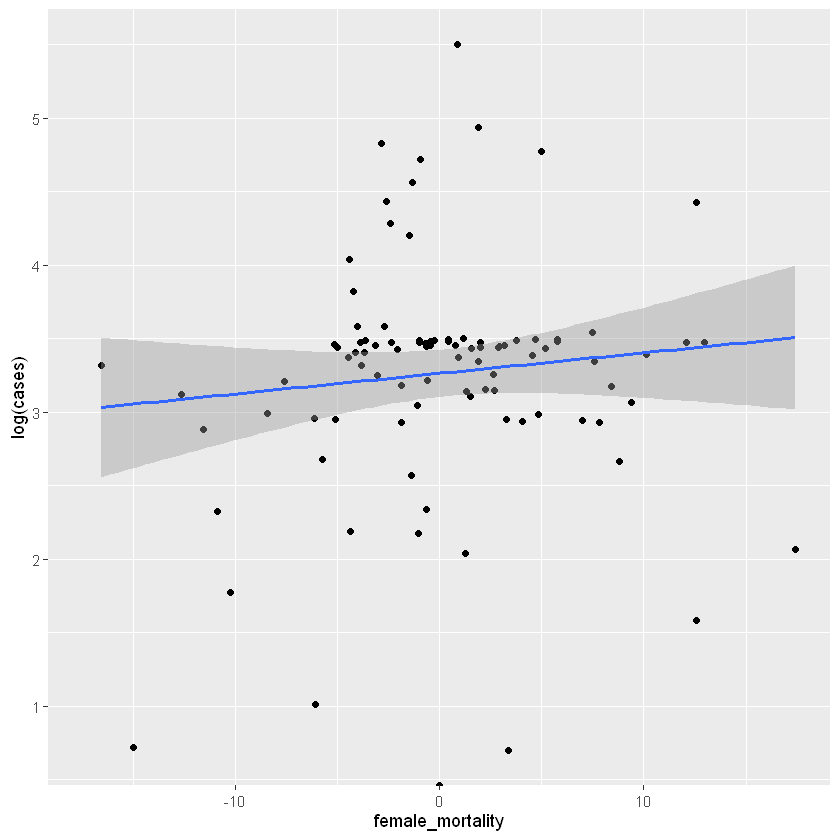

In [94]:
ggplot(data = demeaned_df, aes(x=female_mortality, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


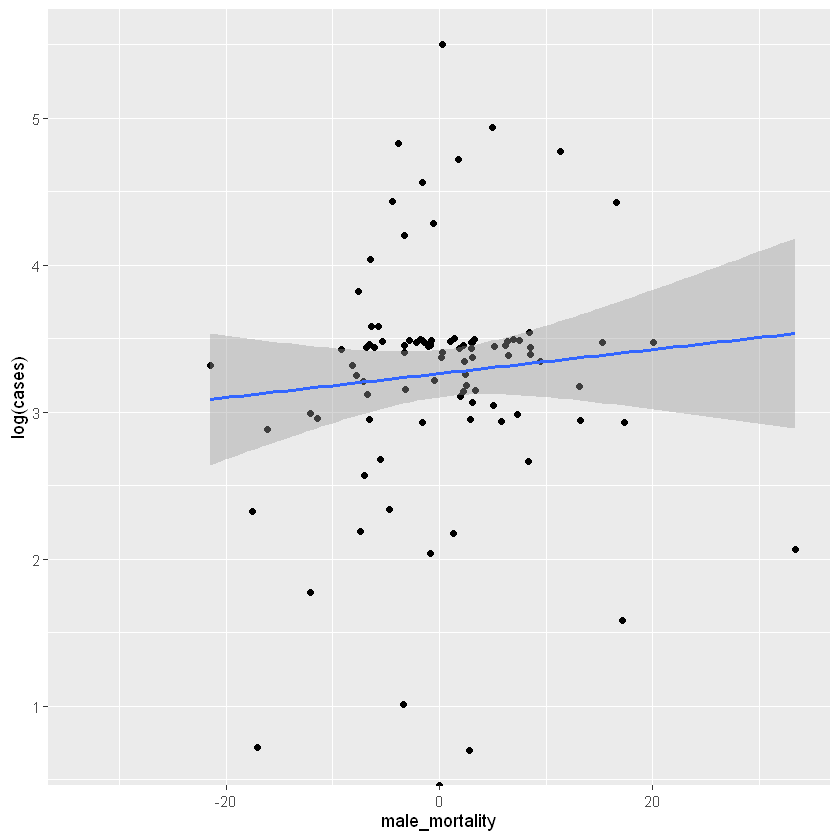

In [95]:
ggplot(data = demeaned_df, aes(x=male_mortality, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


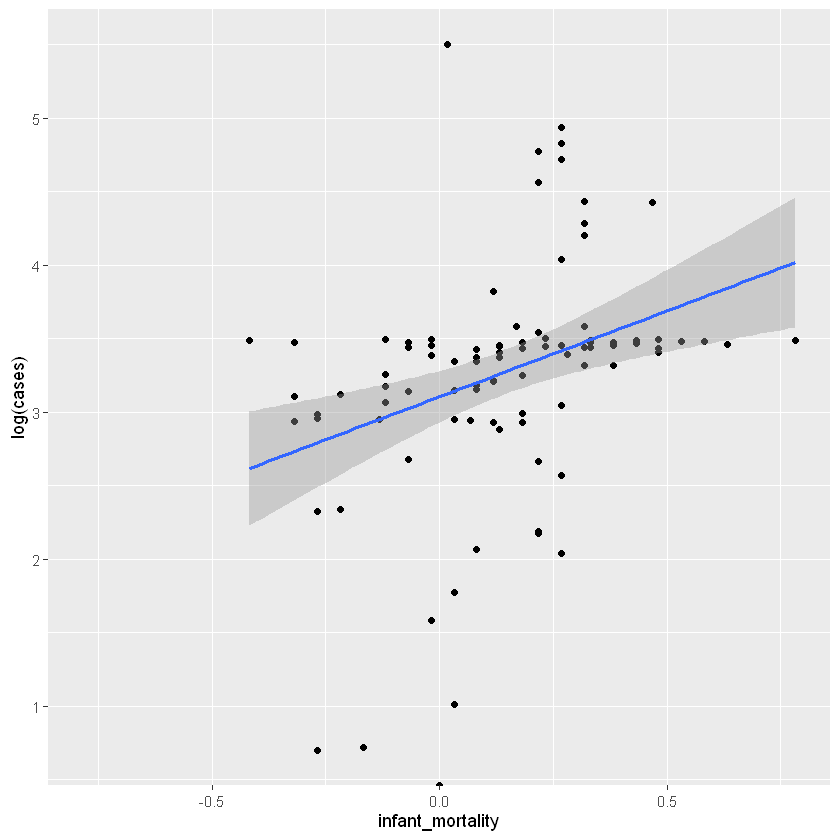

In [96]:
ggplot(data = demeaned_df, aes(x=infant_mortality, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


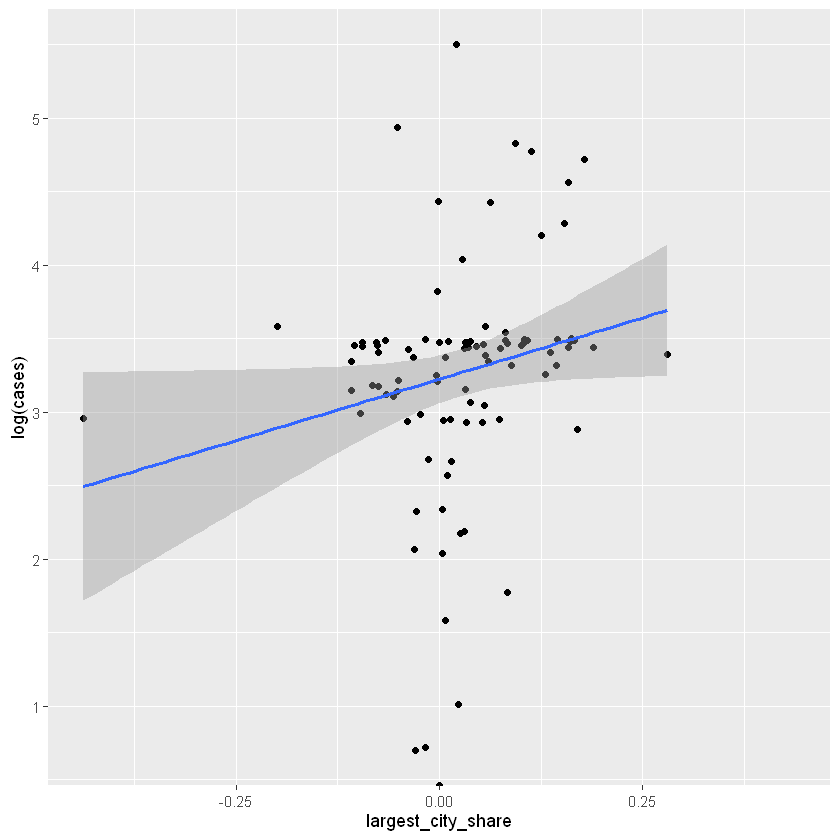

In [97]:
ggplot(data = demeaned_df, aes(x=largest_city_share, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)

Warning message in log(cases):
"созданы NaN"
Warning message in log(cases):
"созданы NaN"
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 97 rows containing non-finite outside the scale range
(`stat_smooth()`)."
Warning message:
"Removed 93 rows containing missing values or values outside the scale range
(`geom_point()`)."


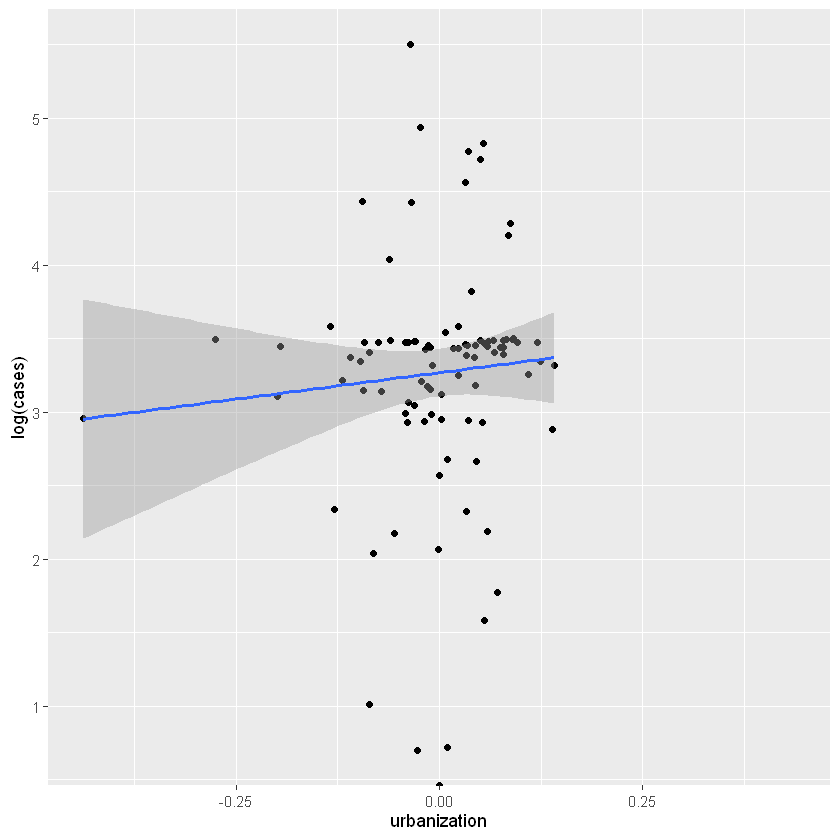

In [98]:
ggplot(data = demeaned_df, aes(x=urbanization, y=log(cases))) + geom_point() + geom_smooth(method = "lm", se = TRUE)